<a href="https://colab.research.google.com/github/zainabhameed24/Advance_tasks_of_Internship-Develoer-Hub-Corporation/blob/main/Internship_Task_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Term Deposit Subscription Prediction (Bank Marketing)**
**Objective:**
Predict whether a bank customer will subscribe to a term deposit as a result of a marketing
campaign.

**Dataset:**
Bank Marketing Dataset (UCI Machine Learning Repository)

**Load and explore the dataset**




In [13]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/bank.csv")
print(df.head(3))

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  


In [ ]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (11162, 17)

Column names:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Data types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


**● Encode all categorical features properly**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('deposit', axis=1)
y = df['deposit']
#---------------------Identify categorical & numerical columns---------------
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# ------------------ ONE-HOT ENCODING ------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)
# ------------------ TRAIN-TEST SPLIT ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit the preprocessor on training set
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# Get feature names after encoding
feature_names = preprocessor.get_feature_names_out()

# Convert back to DataFrame for inspection
X_train_enc = pd.DataFrame(X_train_enc, columns=feature_names, index=X_train.index)
X_test_enc = pd.DataFrame(X_test_enc, columns=feature_names, index=X_test.index)

print("Encoded training shape:", X_train_enc.shape)
print("Sample encoded columns:\n", X_train_enc.head())

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Encoded training shape: (8929, 42)
Sample encoded columns:
       cat__job_blue-collar  cat__job_entrepreneur  cat__job_housemaid  \
8644                   0.0                    0.0                 0.0   
2632                   0.0                    0.0                 0.0   
3056                   0.0                    0.0                 0.0   
1080                   0.0                    0.0                 0.0   
4006                   1.0                    0.0                 0.0   

      cat__job_management  cat__job_retired  cat__job_self-employed  \
8644                  0.0               0.0                     0.0   
2632                  0.0               0.0                     0.0   
3056                  0.0               0.0                     0.0   
1080          

**Train classification models (e.g., Logistic Regression, Random Forest)**

**● Evaluate the models using Confusion Matrix, F1-Score, and ROC Curve**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---- Logistic Regression ----
Confusion Matrix:
 [[987 188]
 [202 856]]

Classification Report:
               precision    recall  f1-score   support

          no       0.83      0.84      0.84      1175
         yes       0.82      0.81      0.81      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.82      0.82      2233
weighted avg       0.83      0.83      0.83      2233

---- Random Forest ----
Confusion Matrix:
 [[976 199]
 [119 939]]

Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.83      0.86      1175
         yes       0.83      0.89      0.86      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



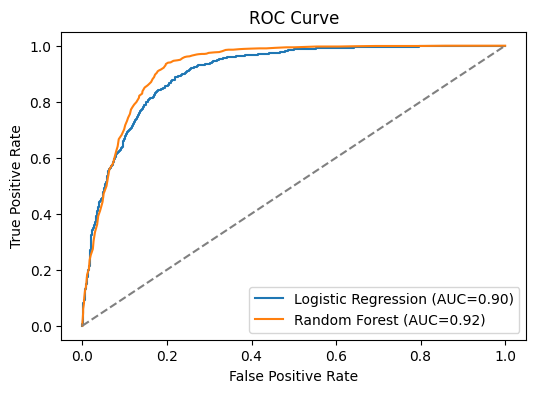

In [17]:
# ------------------ IMPORTS ------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ------------------ LOGISTIC REGRESSION ------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_enc, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_enc)

print("---- Logistic Regression ----")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# ------------------ RANDOM FOREST ------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_enc, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_enc)

print("---- Random Forest ----")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ------------------ ROC CURVE ------------------
y_prob_lr = log_reg.predict_proba(X_test_enc)[:,1]
y_prob_rf = rf.predict_proba(X_test_enc)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr, pos_label="yes")
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label="yes")

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
